# Laptop Sales price prediction

In [1]:
import pandas as pd
import numpy as np
import requests
import os

folder_path= "C:/Users/vince/Data_science_projects/car_price_prediction1/data/raw_collected_data"


file_name = "laptop_pricing_data.csv"
full_path = os.path.join(folder_path,file_name)

def download(url, path):
    response=requests.get(url)
    if response.status_code ==200:
        with open (path, 'wb') as f:
            f.write(response.content)
            print(f'Downloaded to {path}')
    else:
        print("faile to download", response.status_code)


In [2]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_base.csv"
download(url,full_path)

Downloaded to C:/Users/vince/Data_science_projects/car_price_prediction1/data/raw_collected_data\laptop_pricing_data.csv


In [3]:
import os
import sys
sys.path.append(os.path.abspath("../.."))
from db.connection_db import get_engine

df= pd.read_csv(full_path)


engine = get_engine()

df.to_sql("laptop_pricing_data", con=engine, if_exists="replace", index=False)

237

<h1> Task #1: </h1>
<h3>Load the dataset to a pandas dataframe named 'df'</h3>
Print the first 5 entries of the dataset to confirm loading.


In [4]:
df= pd.read_csv(full_path)

df.head(5)

,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6.1,978
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016


<h1> Task #2: </h1>
<h3>Add headers to the dataframe</h3>
The headers for the dataset, in sequence, are "Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core",
"Screen_Size_inch", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg" and "Price".

Confirm insertion by printing the first 10 rows of the dataset.


In [5]:
headers= ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core",
"Screen_Size_inch", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg","Price"
]
df.columns=headers
df.head(5)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016


<h1> Task #3: </h1>
<h3>Replace '?' with 'NaN'</h3>
Replace the '?' entries in the dataset with NaN value, recevied from the Numpy package.

In [6]:
df1= df.replace("?",np.nan).copy()
df1.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.2,634
1,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.2,946
2,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
3,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
4,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.2,1016


<h1> Task #4: </h1>
<h3>Print the data types of the dataframe columns</h3>
Make a note of the data types of the different columns of the dataset.

In [7]:
df1.dtypes

Manufacturer         object
Category              int64
Screen               object
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch     object
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_kg            object
Price                 int64
dtype: object

<h1> Task #5: </h1>
<h3>Print the statistical description of the dataset, including that of 'object' data types.</h3>


In [8]:
df1.describe(include="all")

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,237,237.000000,237,237.000000,237.000000,237.000000,233,237.000000,237.000000,237.000000,232,237.000000
unique,11,NaN,2,NaN,NaN,NaN,9,NaN,NaN,NaN,77,NaN
top,Dell,NaN,Full HD,NaN,NaN,NaN,39.624,NaN,NaN,NaN,2.2,NaN
freq,71,NaN,161,NaN,NaN,NaN,89,NaN,NaN,NaN,21,NaN
mean,NaN,3.202532,NaN,2.151899,1.059072,5.632911,NaN,2.363291,7.881857,245.738397,NaN,1464.388186
std,NaN,0.776450,NaN,0.639556,0.236258,1.243736,NaN,0.409271,2.487845,34.832516,NaN,574.956374
min,NaN,1.000000,NaN,1.000000,1.000000,3.000000,NaN,1.200000,4.000000,128.000000,NaN,527.000000
25%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.000000,8.000000,256.000000,NaN,1068.000000
50%,NaN,3.000000,NaN,2.000000,1.000000,5.000000,NaN,2.500000,8.000000,256.000000,NaN,1333.000000
75%,NaN,4.000000,NaN,3.000000,1.000000,7.000000,NaN,2.700000,8.000000,256.000000,NaN,1777.000000


<h1> Task #6: </h1>
<h3>Print the summary information of the dataset.</h3>

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      237 non-null    object 
 1   Category          237 non-null    int64  
 2   Screen            237 non-null    object 
 3   GPU               237 non-null    int64  
 4   OS                237 non-null    int64  
 5   CPU_core          237 non-null    int64  
 6   Screen_Size_inch  233 non-null    object 
 7   CPU_frequency     237 non-null    float64
 8   RAM_GB            237 non-null    int64  
 9   Storage_GB_SSD    237 non-null    int64  
 10  Weight_kg         232 non-null    object 
 11  Price             237 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 22.3+ KB


# Task - 7

### Evaluate the dataset for missing data
Missing data was last converted from '?' to numpy.NaN. Pandas uses NaN and Null values interchangeably. This means, you can just identify the entries having Null values. Write a code that identifies which columns have missing data. 


In [10]:
missing_data =df1.isnull()
missing_data.head(5)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

Manufacturer
Manufacturer
False    237
Name: count, dtype: int64

Category
Category
False    237
Name: count, dtype: int64

Screen
Screen
False    237
Name: count, dtype: int64

GPU
GPU
False    237
Name: count, dtype: int64

OS
OS
False    237
Name: count, dtype: int64

CPU_core
CPU_core
False    237
Name: count, dtype: int64

Screen_Size_inch
Screen_Size_inch
False    233
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    237
Name: count, dtype: int64

RAM_GB
RAM_GB
False    237
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    237
Name: count, dtype: int64

Weight_kg
Weight_kg
False    232
True       5
Name: count, dtype: int64

Price
Price
False    237
Name: count, dtype: int64



# Task - 8

### Replace with mean
Missing values in attributes that have continuous data are best replaced using Mean value. We note that values in "Weight_kg" attribute are continuous in nature, and some values are missing. Therefore, write a code to replace the missing values of weight with the average value of the attribute.

In [12]:
# Write your code below and press Shift+Enter to execute
avg_weight = df1["Weight_kg"].astype(float).mean(axis=0)
df1["Weight_kg"]=df1["Weight_kg"].fillna(avg_weight)
df1["Weight_kg"].describe()

C:\Users\vince\AppData\Local\Temp\ipykernel_32492\2653462821.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1["Weight_kg"]=df1["Weight_kg"].fillna(avg_weight)


count     237
unique     78
top       2.2
freq       21
Name: Weight_kg, dtype: object

### Replace with the most frequent value
Missing values in attributes that have categorical data are best replaced using the most frequent value. We note that values in "Screen_Size_cm" attribute are categorical in nature, and some values are missing. Therefore, write a code to replace the missing values of Screen Size with the most frequent value of the attribute.

In [13]:
# Write your code below and press Shift+Enter to execute
common_screen_size = df['Screen_Size_inch'].value_counts().idxmax()

df["Screen_Size_inch"].replace(np.nan, common_screen_size)

0      39.624
1      39.624
2      33.782
3      39.624
4      39.624
        ...  
232     35.56
233    33.782
234     30.48
235    39.624
236     35.56
Name: Screen_Size_inch, Length: 237, dtype: object

# Task - 9

### Fixing the data types
Both "Weight_kg" and "Screen_Size_cm" are seen to have the data type "Object", while both of them should be having a data type of "float". Write a code to fix the data type of these two columns.

In [14]:
df1[['Screen_Size_inch']]=df1[['Screen_Size_inch']].astype(float)
df1[["Weight_kg"]]=df1[["Weight_kg"]].astype(float)
df1[['Screen_Size_inch', "Weight_kg"]].dtypes


C:\Users\vince\AppData\Local\Temp\ipykernel_32492\3411883949.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1[['Screen_Size_inch']]=df1[['Screen_Size_inch']].astype(float)
C:\Users\vince\AppData\Local\Temp\ipykernel_32492\3411883949.p

Screen_Size_inch    float64
Weight_kg           float64
dtype: object

# Task - 10

### Data Standardization
The value of Screen_size usually has a standard unit of inches. Similarly, weight of the laptop is needed to be in pounds. Use the below mentioned units of conversion and write a code to modify the columns of the dataframe accordingly. Update their names as well.

```{math}
1 inch = 2.54 cm
1 kg   = 2.205 pounds
```

In [15]:
df1["Weight_kg"] =df1["Weight_kg"].astype(float)*2.205
df1.rename(columns={"Weight_kg": "Weight_pounds"}, inplace=True)
df1.columns

C:\Users\vince\AppData\Local\Temp\ipykernel_32492\3431114791.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1["Weight_kg"] =df1["Weight_kg"].astype(float)*2.205


Index(['Manufacturer', 'Category', 'Screen', 'GPU', 'OS', 'CPU_core',
       'Screen_Size_inch', 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD',
       'Weight_pounds', 'Price'],
      dtype='object')

### Data Normalization
Often it is required to normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.

In [16]:
df1['CPU_frequency']=df1['CPU_frequency']/df1['CPU_frequency'].max()
df1['CPU_frequency']

C:\Users\vince\AppData\Local\Temp\ipykernel_32492\3175953617.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1['CPU_frequency']=df1['CPU_frequency']/df1['CPU_frequency'].max()


0      0.689655
1      0.931034
2      0.551724
3      0.620690
4      0.551724
         ...   
232    0.896552
233    0.827586
234    0.896552
235    0.862069
236    0.793103
Name: CPU_frequency, Length: 237, dtype: float64

# Task - 11

### Binning
Binning is a process of creating a categorical attribute which splits the values of a continuous data into a specified number of groups. In this case, write a code to create 3 bins for the attribute "Price". These bins would be named "Low", "Medium" and "High". The new attribute will be named "Price-binned".

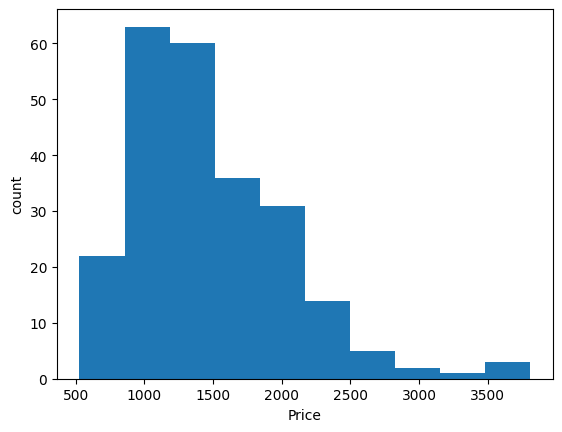

In [17]:
import matplotlib.pyplot as plt

plt.hist(df1["Price"])
plt.xlabel("Price")
plt.ylabel("count")
plt.show()

C:\Users\vince\AppData\Local\Temp\ipykernel_32492\2553044707.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1["Price_binned"]= pd.cut(df1["Price"], bins , labels=group_names, include_lowest=True)


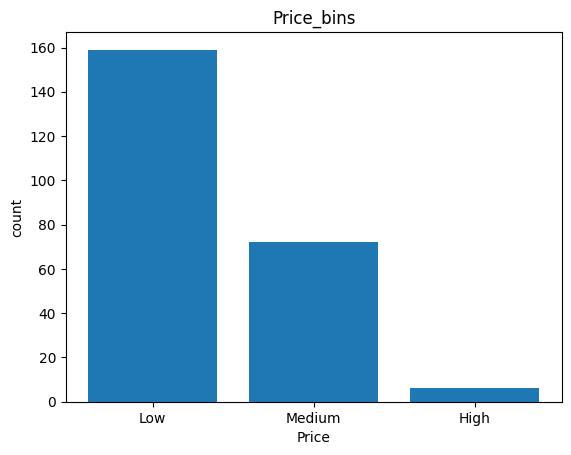

In [18]:
bins= np.linspace(min(df1["Price"]), max(df1["Price"]),4)
group_names= ["Low","Medium","High"]
df1["Price_binned"]= pd.cut(df1["Price"], bins , labels=group_names, include_lowest=True)

import matplotlib.pyplot as plt
plt.bar(group_names, df1["Price_binned"].value_counts())
plt.xlabel("Price")
plt.ylabel("count")
plt.title("Price_bins")
plt.show()

In [19]:
df1.head(5)

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned
0,Dell,3,Full HD,1,1,3,39.624,0.689655,4,256,4.85100,634,Low
1,Dell,3,Full HD,1,1,7,39.624,0.931034,8,256,4.85100,946,Low
2,Dell,4,IPS Panel,2,1,5,33.782,0.551724,8,128,2.69010,1244,Low
3,HP,4,Full HD,2,1,7,39.624,0.620690,8,256,4.21155,837,Low
4,Dell,3,Full HD,1,1,5,39.624,0.551724,8,256,4.85100,1016,Low


# Task - 12

### Indicator variables
Convert the "Screen" attribute of the dataset into 2 indicator variables, "Screen-IPS_panel" and "Screen-Full_HD". Then drop the "Screen" attribute from the dataset.

In [20]:
dummy_variables = pd.get_dummies(df1["Screen"], dtype=int)
dummy_variables.rename(columns={"IPS Panel": "Screen-IPS_panel", "Full_HD":"Screen-Full_HD"}, inplace=True)

#concatenate the dummy_variables with df1
df1 = pd.concat([df1 , dummy_variables], axis=1)

# drop original column "Screen" from "df"
df1.drop("Screen", axis= 1, inplace = True)
df1.head(5)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned,Full HD,Screen-IPS_panel
0,Dell,3,1,1,3,39.624,0.689655,4,256,4.85100,634,Low,1,0
1,Dell,3,1,1,7,39.624,0.931034,8,256,4.85100,946,Low,1,0
2,Dell,4,2,1,5,33.782,0.551724,8,128,2.69010,1244,Low,0,1
3,HP,4,2,1,7,39.624,0.620690,8,256,4.21155,837,Low,1,0
4,Dell,3,1,1,5,39.624,0.551724,8,256,4.85100,1016,Low,1,0


In [21]:
clean_data_folder_path="C:/Users/vince/Data_science_projects/car_price_prediction1/data/clean_data"
clean_file_name = "laptop_pricing_cleaned_data.csv"
clean_full_path = os.path.join(clean_data_folder_path,clean_file_name)
df1.to_csv(clean_full_path,index=False)

df1.to_sql("laptop_pricing_cleaned_data", con=engine, if_exists="replace", index=False)
df1.head(5)


,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price_binned,Full HD,Screen-IPS_panel
0,Dell,3,1,1,3,39.624,0.689655,4,256,4.85100,634,Low,1,0
1,Dell,3,1,1,7,39.624,0.931034,8,256,4.85100,946,Low,1,0
2,Dell,4,2,1,5,33.782,0.551724,8,128,2.69010,1244,Low,0,1
3,HP,4,2,1,7,39.624,0.620690,8,256,4.21155,837,Low,1,0
4,Dell,3,1,1,5,39.624,0.551724,8,256,4.85100,1016,Low,1,0
